<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Samajwadi Party - SP</td>
<td style="text-align:right">
<a href="partywisewinresult-1680S24.htm">37</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">37</td>
</tr>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresult-369S24.htm">33</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td

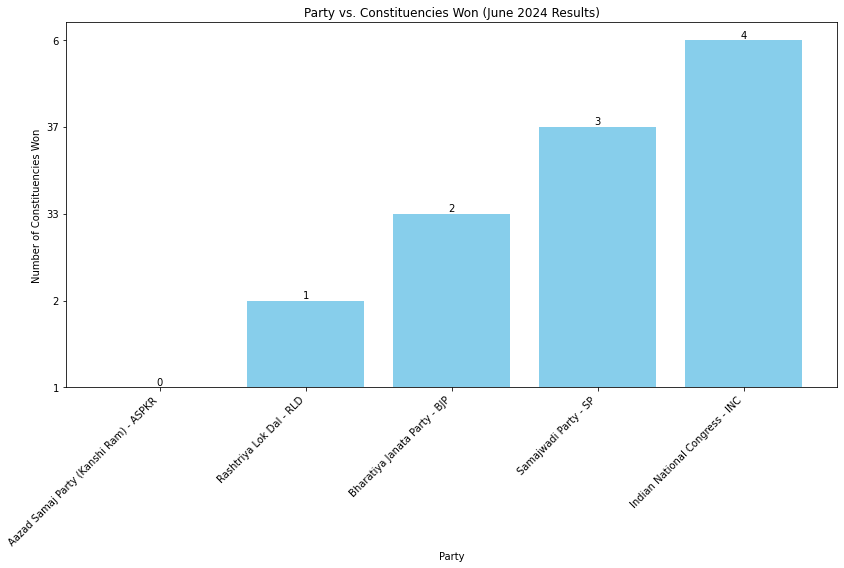

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

URL = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')
print(table)
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

data = []
for row in table.find('tbody').find_all('tr')[:-1]:
  data.append([td.text.strip() for td in row.find_all('td')])

df = pd.DataFrame(data, columns=headers)

print(df)
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.ylabel('Number of Constituencies Won')
plt.xlabel('Party')
plt.title('Party vs. Constituencies Won (June 2024 Results)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.0f}', 
             va='bottom', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

TypeError: can only concatenate str (not "int") to str

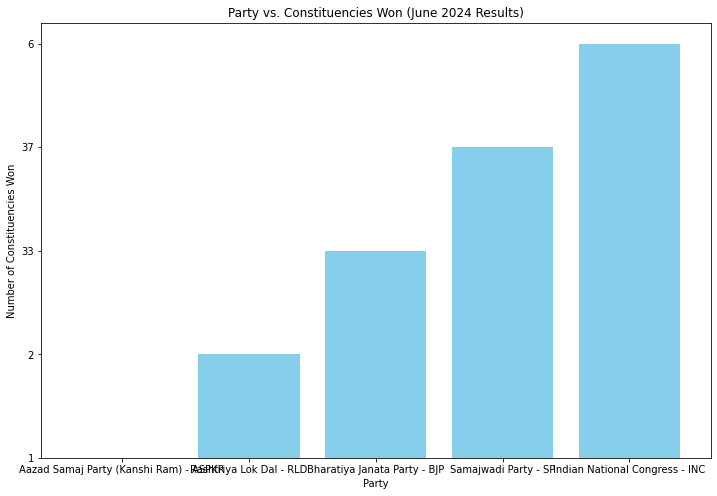

In [2]:
import matplotlib.pyplot as plt

# Sort dataframe by 'Won' column in ascending order
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.ylabel('Number of Constituencies Won')
plt.xlabel('Party')
plt.title('Party vs. Constituencies Won (June 2024 Results)')

# Set y-axis ticks with increments of 5
plt.yticks(range(0, max(df_sorted['Won'])+1, 5))

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.0f}', 
             va='bottom', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


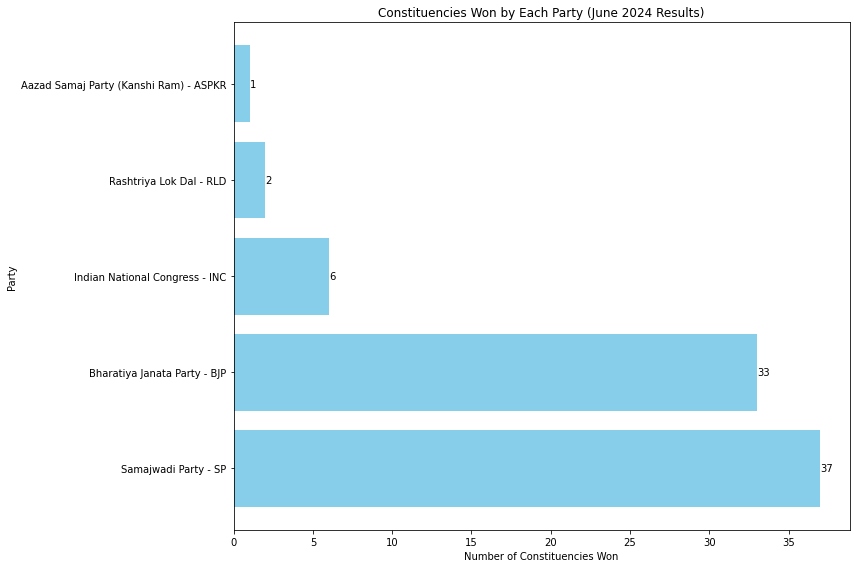

Scraped Data:
                                    Party  Won Leading Total
4  Aazad Samaj Party (Kanshi Ram) - ASPKR    1       0     1
3                 Rashtriya Lok Dal - RLD    2       0     2
2          Indian National Congress - INC    6       0     6
1            Bharatiya Janata Party - BJP   33       0    33
0                    Samajwadi Party - SP   37       0    37


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the website
URL = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')

# Extract table headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract table data
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
df['Won'] = pd.to_numeric(df['Won'])  # Convert 'Won' column to numeric for sorting
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.xlabel('Number of Constituencies Won')
plt.ylabel('Party')
plt.title('Constituencies Won by Each Party (June 2024 Results)')

# Customize y-axis ticks
plt.yticks(np.arange(len(df_sorted['Party'])), df_sorted['Party'])
plt.gca().invert_yaxis()  # Invert y-axis to have the party with most wins at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the scraped data
print("Scraped Data:")
print(df_sorted)


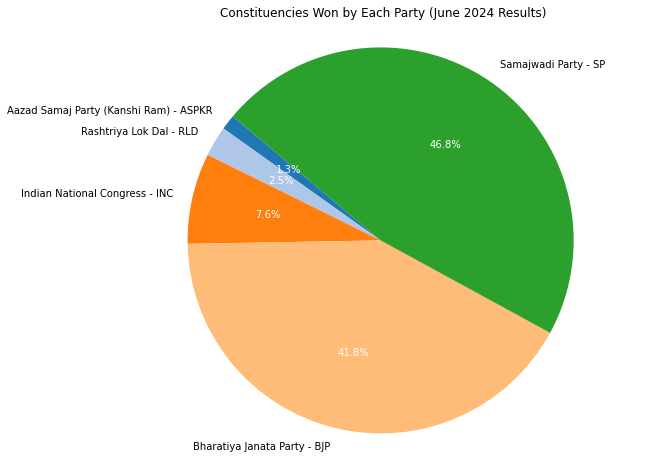

In [4]:
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Convert 'Won' column to numeric for sorting
df['Won'] = pd.to_numeric(df['Won'])

# Sort dataframe by 'Won' column in ascending order
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting a pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Using the 'tab20' colormap for variety of colors

# Plot pie chart
wedges, texts, autotexts = plt.pie(df_sorted['Won'], labels=df_sorted['Party'], colors=colors,
                                   autopct='%1.1f%%', startangle=140)

plt.title('Constituencies Won by Each Party (June 2024 Results)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Customizing autotexts (percent labels) for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

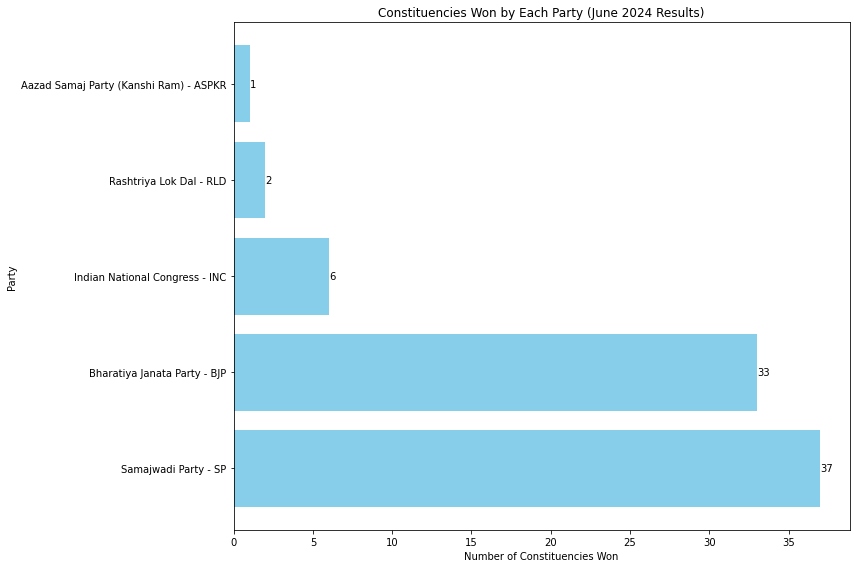

Scraped Data:
                                    Party  Won Leading Total
4  Aazad Samaj Party (Kanshi Ram) - ASPKR    1       0     1
3                 Rashtriya Lok Dal - RLD    2       0     2
2          Indian National Congress - INC    6       0     6
1            Bharatiya Janata Party - BJP   33       0    33
0                    Samajwadi Party - SP   37       0    37


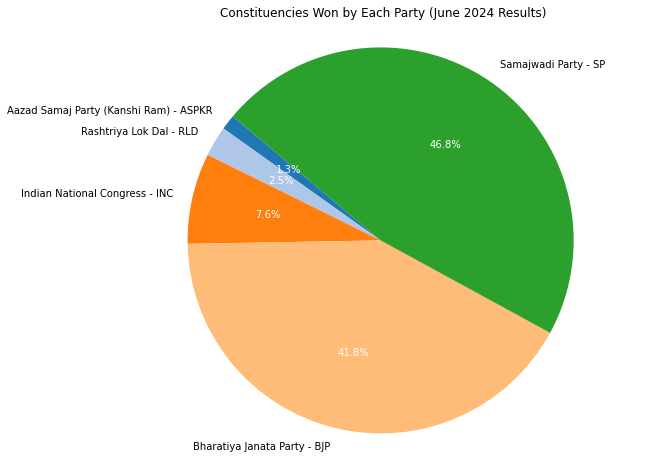

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the website
URL = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')

# Extract table headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract table data
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
df['Won'] = pd.to_numeric(df['Won'])  # Convert 'Won' column to numeric for sorting
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.xlabel('Number of Constituencies Won')
plt.ylabel('Party')
plt.title('Constituencies Won by Each Party (June 2024 Results)')

# Customize y-axis ticks
plt.yticks(np.arange(len(df_sorted['Party'])), df_sorted['Party'])
plt.gca().invert_yaxis()  # Invert y-axis to have the party with most wins at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the scraped data
print("Scraped Data:")
print(df_sorted)
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Convert 'Won' column to numeric for sorting
df['Won'] = pd.to_numeric(df['Won'])

# Sort dataframe by 'Won' column in ascending order
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting a pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Using the 'tab20' colormap for variety of colors

# Plot pie chart
wedges, texts, autotexts = plt.pie(df_sorted['Won'], labels=df_sorted['Party'], colors=colors,
                                   autopct='%1.1f%%', startangle=140)

plt.title('Constituencies Won by Each Party (June 2024 Results)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Customizing autotexts (percent labels) for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the new website
URL = "https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S2477.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')

# Extract table headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract table data
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
df['Votes'] = pd.to_numeric(df['Votes'])  # Convert 'Votes' column to numeric for sorting
df_sorted = df.sort_values(by='Votes', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Candidate'], df_sorted['Votes'], color='skyblue')

plt.xlabel('Number of Votes')
plt.ylabel('Candidate')
plt.title('Votes Received by Each Candidate (June 2024 Results)')

# Customize y-axis ticks
plt.yticks(np.arange(len(df_sorted['Candidate'])), df_sorted['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the scraped data
print("Scraped Data:")
print(df_sorted)


AttributeError: 'NoneType' object has no attribute 'find'

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the new website
URL = "https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S2477.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Find the table element with a specific class
table = soup.find('table', class_='table')

if table is None:
    raise ValueError(f"Could not find table with class 'table' on the page {URL}")

# Extract table headers
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]
else:
    headers = []

# Extract table data
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr')[:-1]:  # Exclude the last row which is total
        data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
if not df.empty:
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')  # Convert 'Votes' column to numeric, handle errors gracefully
    df.dropna(subset=['Votes'], inplace=True)  # Drop rows with NaN values in 'Votes' column

    # Sort dataframe by 'Votes' column in descending order
    df_sorted = df.sort_values(by='Votes', ascending=False)

    # Plotting the bar graph
    plt.figure(figsize=(12, 8))
    bars = plt.barh(df_sorted['Candidate'], df_sorted['Votes'], color='skyblue')

    plt.xlabel('Number of Votes')
    plt.ylabel('Candidate')
    plt.title('Votes Received by Each Candidate (June 2024 Results)')

    # Customize y-axis ticks
    plt.yticks(np.arange(len(df_sorted['Candidate'])), df_sorted['Candidate'])
    plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

    # Add value labels on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                 va='center', ha='left', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

    # Display the scraped data
    print("Scraped Data:")
    print(df_sorted)
else:
    print("No data found or unable to process the scraped data.")


ValueError: Could not find table with class 'table' on the page https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S2477.htm

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the website
URL = "https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S2477.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')

# Extract table headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract table data
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
df['Won'] = pd.to_numeric(df['Won'])  # Convert 'Won' column to numeric for sorting
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.xlabel('Number of Constituencies Won')
plt.ylabel('Party')
plt.title('Constituencies Won by Each Party (June 2024 Results)')

# Customize y-axis ticks
plt.yticks(np.arange(len(df_sorted['Party'])), df_sorted['Party'])
plt.gca().invert_yaxis()  # Invert y-axis to have the party with most wins at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the scraped data
print("Scraped Data:")
print(df_sorted)
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Convert 'Won' column to numeric for sorting
df['Won'] = pd.to_numeric(df['Won'])

# Sort dataframe by 'Won' column in ascending order
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting a pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Using the 'tab20' colormap for variety of colors

# Plot pie chart
wedges, texts, autotexts = plt.pie(df_sorted['Won'], labels=df_sorted['Party'], colors=colors,
                                   autopct='%1.1f%%', startangle=140)

plt.title('Constituencies Won by Each Party (June 2024 Results)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Customizing autotexts (percent labels) for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

AttributeError: 'NoneType' object has no attribute 'find'

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the new website
URL = "https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S2477.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Find the table element with a specific class
table = soup.find('table', class_='table')

if table is None:
    raise ValueError(f"Could not find table with class 'table' on the page {URL}")

# Extract table headers
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]
else:
    headers = []

# Extract table data
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr')[:-1]:  # Exclude the last row which is total
        data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
if not df.empty:
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')  # Convert 'Votes' column to numeric, handle errors gracefully
    df.dropna(subset=['Votes'], inplace=True)  # Drop rows with NaN values in 'Votes' column

    # Sort dataframe by 'Votes' column in descending order
    df_sorted = df.sort_values(by='Votes', ascending=False)

    # Plotting the bar graph
    plt.figure(figsize=(12, 8))
    bars = plt.barh(df_sorted['Candidate'], df_sorted['Votes'], color='skyblue')

    plt.xlabel('Number of Votes')
    plt.ylabel('Candidate')
    plt.title('Votes Received by Each Candidate (June 2024 Results)')

    # Customize y-axis ticks
    plt.yticks(np.arange(len(df_sorted['Candidate'])), df_sorted['Candidate'])
    plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

    # Add value labels on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                 va='center', ha='left', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

    # Display the scraped data
    print("Scraped Data:")
    print(df_sorted)
else:
    print("No data found or unable to process the scraped data.")


ValueError: Could not find table with class 'table' on the page https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S2477.htm

In [10]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Use Selenium WebDriver to fetch the page content
URL = "https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S2477.htm"

# Configure Selenium WebDriver (Chrome driver)
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # To run Chrome in headless mode (no GUI)
driver = webdriver.Chrome(options=options)  # Make sure Chromedriver is installed and in PATH

driver.get(URL)
time.sleep(5)  # Wait for the page to fully load (adjust as necessary)

# Get page source and pass it to BeautifulSoup
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')

# Find the table element with a specific class
table = soup.find('table', class_='table')

if table is None:
    raise ValueError(f"Could not find table with class 'table' on the page {URL}")

# Extract table headers
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]
else:
    headers = []

# Extract table data
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr')[:-1]:  # Exclude the last row which is total
        data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
if not df.empty:
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')  # Convert 'Votes' column to numeric, handle errors gracefully
    df.dropna(subset=['Votes'], inplace=True)  # Drop rows with NaN values in 'Votes' column

    # Sort dataframe by 'Votes' column in descending order
    df_sorted = df.sort_values(by='Votes', ascending=False)

    # Plotting the bar graph
    plt.figure(figsize=(12, 8))
    bars = plt.barh(df_sorted['Candidate'], df_sorted['Votes'], color='skyblue')

    plt.xlabel('Number of Votes')
    plt.ylabel('Candidate')
    plt.title('Votes Received by Each Candidate (June 2024 Results)')

    # Customize y-axis ticks
    plt.yticks(np.arange(len(df_sorted['Candidate'])), df_sorted['Candidate'])
    plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

    # Add value labels on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                 va='center', ha='left', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

    # Display the scraped data
    print("Scraped Data:")
    print(df_sorted)
else:
    print("No data found or unable to process the scraped data.")

# Quit the Selenium WebDriver session
driver.quit()


ModuleNotFoundError: No module named 'selenium'

In [11]:
!pip install requests beautifulsoup4 pandas matplotlib selenium

ERROR: selenium 4.22.0 has requirement certifi>=2021.10.8, but you'll have certifi 2020.6.20 which is incompatible.
ERROR: selenium 4.22.0 has requirement urllib3[socks]<3,>=1.26, but you'll have urllib3 1.25.9 which is incompatible.



  Attempting uninstall: attrs
    Found existing installation: attrs 19.3.0
    Uninstalling attrs-19.3.0:
      Successfully uninstalled attrs-19.3.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.2
    Uninstalling typing-extensions-3.7.4.2:
      Successfully uninstalled typing-extensions-3.7.4.2


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the website
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS2477.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')

# Extract table headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract table data
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
df['Won'] = pd.to_numeric(df['Won'])  # Convert 'Won' column to numeric for sorting
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.xlabel('Number of Constituencies Won')
plt.ylabel('Party')
plt.title('Constituencies Won by Each Party (June 2024 Results)')

# Customize y-axis ticks
plt.yticks(np.arange(len(df_sorted['Party'])), df_sorted['Party'])
plt.gca().invert_yaxis()  # Invert y-axis to have the party with most wins at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the scraped data
print("Scraped Data:")
print(df_sorted)
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Convert 'Won' column to numeric for sorting
df['Won'] = pd.to_numeric(df['Won'])

# Sort dataframe by 'Won' column in ascending order
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting a pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Using the 'tab20' colormap for variety of colors

# Plot pie chart
wedges, texts, autotexts = plt.pie(df_sorted['Won'], labels=df_sorted['Party'], colors=colors,
                                   autopct='%1.1f%%', startangle=140)

plt.title('Constituencies Won by Each Party (June 2024 Results)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Customizing autotexts (percent labels) for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

KeyError: 'Won'

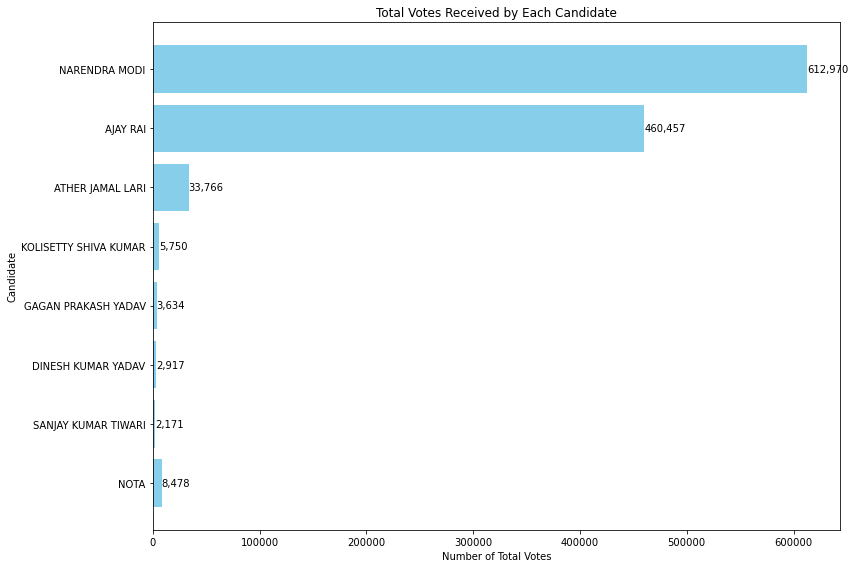

Scraped Data:
  S.N.              Candidate                     Party  EVM Votes  \
0    1          NARENDRA MODI    Bharatiya Janata Party     611439   
1    2               AJAY RAI  Indian National Congress     459084   
2    3       ATHER JAMAL LARI       Bahujan Samaj Party      33646   
3    4  KOLISETTY SHIVA KUMAR        Yuga Thulasi Party       5748   
4    5    GAGAN PRAKASH YADAV     Apna Dal (Kamerawadi)       3619   
5    6     DINESH KUMAR YADAV               Independent       2912   
6    7    SANJAY KUMAR TIWARI               Independent       2170   
7    8                   NOTA         None of the Above       8463   

   Postal Votes  Total Votes  % of Votes  
0          1531       612970       54.24  
1          1373       460457       40.74  
2           120        33766        2.99  
3             2         5750        0.51  
4            15         3634        0.32  
5             5         2917        0.26  
6             1         2171        0.19  
7          

In [13]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS2477.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)
